In [1]:
from model_utils import configuration as cnf
from analysis import restore_plots
from model_utils import initialisation as init
import sectors

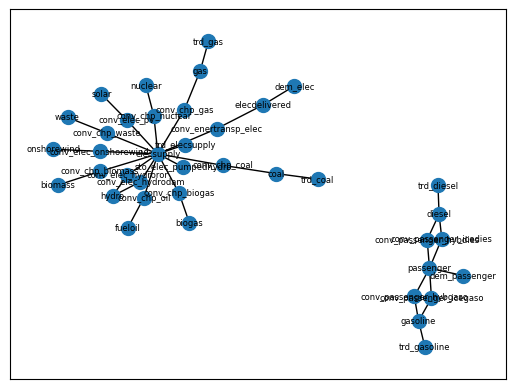

In [2]:
# Show network complexity
restore_plots.plot_io_network(cnf.DATA.fxe["FiE"], cnf.DATA.fxe["FoE"])

In [3]:
# Model setup
model = init.init_model()

sectors.trade.configure_sector(model)
sectors.extraction.configure_sector(model)
sectors.storage.configure_sector(model)

sectors.electricity.configure_sector(model)
sectors.enertransp.configure_sector(model)
sectors.passenger.configure_sector(model)

sectors.demands.configure_sector(model)

In [6]:
import pyomo.environ as pyo

cost_sectors = [sectors.trade, sectors.extraction, sectors.storage, sectors.electricity, sectors.enertransp,
                sectors.passenger]
cost_expr = pyo.Expression()
for sector in cost_sectors:
    cost_expr += sector.get_cost(model)
model.cost = pyo.Objective(expr=cost_expr, sense=pyo.minimize)
model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

AttributeError: 'NoneType' object has no attribute 'is_potentially_variable'

In [ ]:
opt = pyo.SolverFactory("gurobi", solver_io="python")
opt.options["MIPGap"] = 1e-2
opt.options["Timelimit"] = 1800
try:
    opt_result = opt.solve(model, tee=False)
    print(opt_result)
except ValueError:
    model.write("debug.lp", format="lp", io_options={"symbolic_solver_labels": True})

# Plotting

In [ ]:
restore_plots.plot_fout_act(model, cnf.DATA, "passenger", unit="TWh")

# Debug
Check your model run :)

In [ ]:
from pyomo.util import infeasible
infeasible.log_infeasible_constraints(model, log_expression=True, log_variables=True)
infeasible.log_infeasible_bounds(model)
# infeasible.log_close_to_bounds(model)

In [ ]:
import gurobi

model.write("debug.lp", format="lp", io_options={"symbolic_solver_labels": True})
m = gurobi.read("debug.lp")
m.optimize()
m.computeIIS()
m.write("debug_{0}.ilp".format("CHE"))